In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def gaussian_kernel(X, x_query, tau):
    """Compute Gaussian weights for all training samples."""
    return np.exp(-np.sum((X - x_query) ** 2, axis=1) / (2 * tau ** 2))

In [36]:
def locally_weighted_regression(X, y, x_test, tau):
    """Perform Locally Weighted Regression (LWR)."""
    m, n = X.shape
    y_pred = np.zeros(x_test.shape[0])
    
    for i, x_q in enumerate(x_test):
        W = np.diag(gaussian_kernel(X, x_q, tau))  # Compute weights
        XTWX = X.T @ W @ X
        theta = np.linalg.inv(XTWX) @ X.T @ W @ y  # Compute theta
        y_pred[i] = x_q @ theta  # Predict y for x_q
        
    return y_pred

In [38]:
# Generate Data
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]  # Add bias term

In [40]:
# Test points
x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]

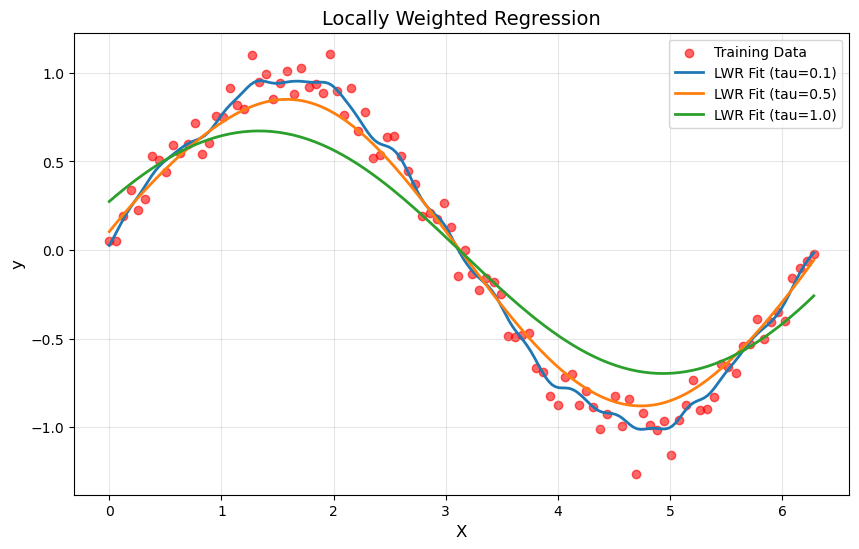

In [46]:
# Experiment with different tau values
taus = [0.1, 0.5, 1.0]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.6)

for tau in taus:
    y_pred = locally_weighted_regression(X_bias, y, x_test_bias, tau)
    plt.plot(x_test, y_pred, label=f'LWR Fit (tau={tau})', linewidth=2)

plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally Weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()
